In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_excel("reg.xlsx")

In [3]:
df

,RollNo,Name,ProgramName,Discipline
0,22110001,Aaditya Roy,B.Tech(JEE),Materials Science & Engineering
1,22110002,Aadya Arora,B.Tech-M.Tech(JEE),Electrical Engineering
2,22110003,Aakash Kushwah,B.Tech(JEE),Civil Engineering
3,22110004,Aarav Shah,B.Tech(JEE),Mechanical Engineering
4,22110005,Aashmun Gupta,B.Tech-M.Tech(JEE),Comp Science & Engg
...,...,...,...,...
282,22110295,Yash Bachwana,B.Tech(JEE),Electrical Engineering
283,22110296,Yash Shailesh Patkar,B.Tech(JEE),Comp Science & Engg
284,22110297,Zala Darshan Dinesh,B.Tech-M.Tech(JEE),Electrical Engineering
285,22110298,Zunjare Tejas Gajanan,B.Tech(JEE),Electrical Engineering


In [5]:
df.head()

,RollNo,Name,ProgramName,Discipline
0,22110001,Aaditya Roy,B.Tech(JEE),Materials Science & Engineering
1,22110002,Aadya Arora,B.Tech-M.Tech(JEE),Electrical Engineering
2,22110003,Aakash Kushwah,B.Tech(JEE),Civil Engineering
3,22110004,Aarav Shah,B.Tech(JEE),Mechanical Engineering
4,22110005,Aashmun Gupta,B.Tech-M.Tech(JEE),Comp Science & Engg


In [12]:
df.Name

0               Aaditya Roy 
1               Aadya Arora 
2            Aakash Kushwah 
3                 Aarav Shah
4              Aashmun Gupta
               ...          
282           Yash  Bachwana
283     Yash Shailesh Patkar
284      Zala Darshan Dinesh
285    Zunjare Tejas Gajanan
286           Harshita Singh
Name: Name, Length: 287, dtype: object

### Length of names

<AxesSubplot:ylabel='Frequency'>

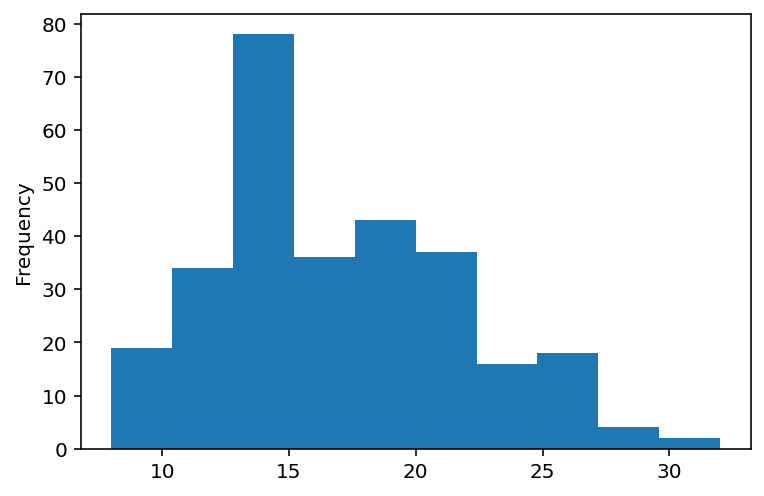

In [13]:
df.Name.str.len().plot(kind='hist')

### Find short names

In [17]:
df[df.Name.str.len()<10]

,RollNo,Name,ProgramName,Discipline
5,22110006,Aayushi,B.Tech(JEE),Electrical Engineering
91,22110095,Harshit,B.Tech-M.Tech(JEE),Comp Science & Engg
109,22110113,Kaushik,B.Tech(JEE),Chemical Engineering
112,22110116,Keshav,B.Tech(JEE),Materials Science & Engineering
126,22110130,Lavanya,B.Tech(JEE),Comp Science & Engg
163,22110169,Nimitt,B.Tech(JEE),Electrical Engineering
168,22110174,Om Gupta,B.Tech(JEE),Chemical Engineering
171,22110177,Pankaj,B.Tech(JEE),Chemical Engineering
214,22110223,Rituraj,B.Tech(JEE),Chemical Engineering
216,22110225,Rudra M,B.Tech(JEE),Chemical Engineering


Seems that mostly people with only first name have overall `short` lengths.

### Do we have any repeating names? Take 1

In [19]:
pd.value_counts(df.Name)

Aaditya Roy              1
Pradeep Kumar Meena      1
Pranshu  Kaushik         1
Pranjal Gaur             1
Pranav  Somase           1
                        ..
Hrriday Viraj Ruparel    1
Hitesh Kumar             1
Hiranmay Mushahary       1
Heer Nilesh Kubadia      1
Harshita Singh           1
Name: Name, Length: 287, dtype: int64

In [20]:
pd.value_counts(df.Name).max()

1

### Finding the first name and then repeating analysis

In [28]:
df.Name.str.split(" ", expand=True)

,0,1,2,3
0,Aaditya,Roy,,None
1,Aadya,Arora,,None
2,Aakash,Kushwah,,None
3,Aarav,Shah,None,None
4,Aashmun,Gupta,None,None
...,...,...,...,...
282,Yash,,Bachwana,None
283,Yash,Shailesh,Patkar,None
284,Zala,Darshan,Dinesh,None
285,Zunjare,Tejas,Gajanan,None


In [33]:
df["Firstname"] = df.Name.str.split(" ", expand=True)[0]
df.head()

,RollNo,Name,ProgramName,Discipline,first,Firstname
0,22110001,Aaditya Roy,B.Tech(JEE),Materials Science & Engineering,Aaditya,Aaditya
1,22110002,Aadya Arora,B.Tech-M.Tech(JEE),Electrical Engineering,Aadya,Aadya
2,22110003,Aakash Kushwah,B.Tech(JEE),Civil Engineering,Aakash,Aakash
3,22110004,Aarav Shah,B.Tech(JEE),Mechanical Engineering,Aarav,Aarav
4,22110005,Aashmun Gupta,B.Tech-M.Tech(JEE),Comp Science & Engg,Aashmun,Aashmun


In [40]:
pd.value_counts(df["Firstname"]).head(24)

Aditya       5
Pranav       4
Keshav       3
Patel        3
Anmol        2
Daksh        2
Siddharth    2
Dewansh      2
Atharva      2
Rahul        2
Manas        2
Aryan        2
Mantri       2
Kethavath    2
Mayank       2
Vedant       2
Patil        2
Nikhil       2
Akshat       2
Vishal       2
Abhishek     2
Abhinav      2
Harsh        2
Yash         2
Name: Firstname, dtype: int64

### How many names start with different characters?!

In [50]:
pd.value_counts(df["Firstname"].str[0])

A    41
S    38
P    30
M    28
K    19
R    19
D    15
V    14
N    12
C    11
H    11
T     9
J     8
B     8
G     7
L     3
O     3
Y     3
U     2
I     2
Z     2
F     1
E     1
Name: Firstname, dtype: int64

### Plotting in decreasing frequency

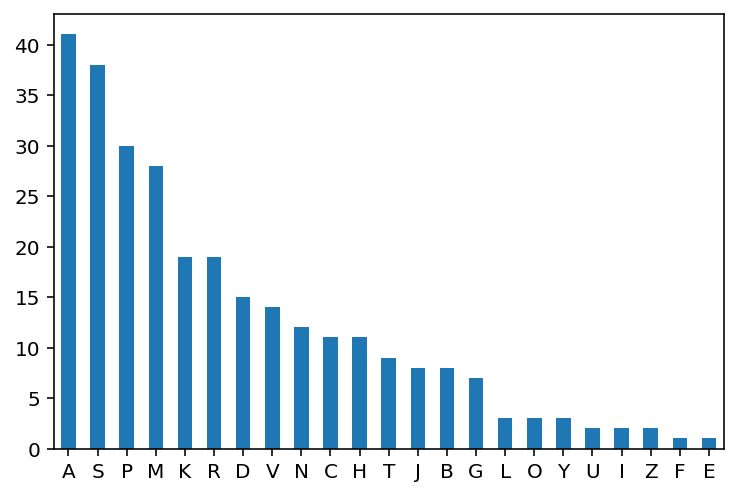

In [53]:
pd.value_counts(df["Firstname"].str[0]).plot(kind='bar', rot=0);

### Plotting in order of alphabet

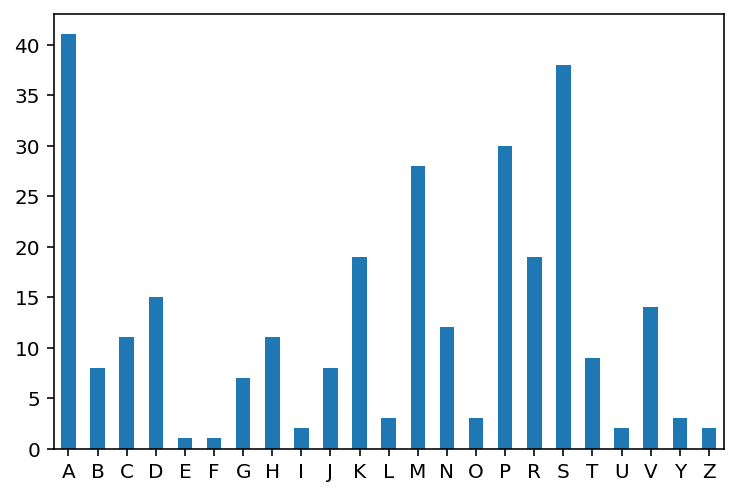

In [58]:
pd.value_counts(df["Firstname"].str[0]).sort_index().plot(kind='bar', rot=0);

### Number of people per discipline

<AxesSubplot:xlabel='Discipline'>

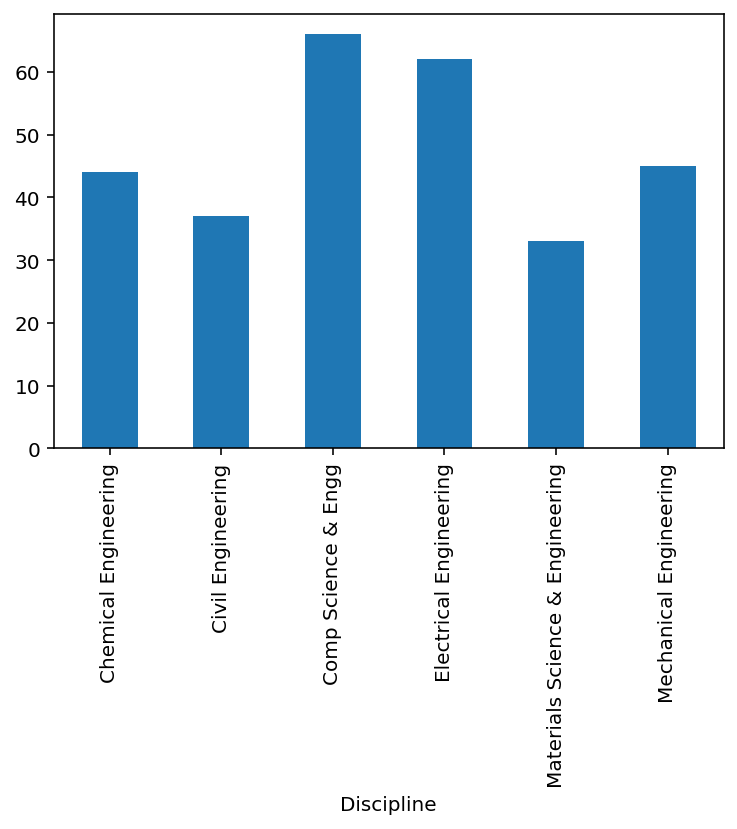

In [67]:
df.groupby("Discipline")["Name"].count().plot(kind='bar')

### Number of people per degree and discipline!

In [87]:
df.groupby(["Discipline", "ProgramName"])[["Name"]].count()

Name
Discipline                      ProgramName             
Chemical Engineering            B.Tech(JEE)           44
Civil Engineering               B.Tech(JEE)           37
Comp Science & Engg             B.Tech(JEE)           43
                                B.Tech(Olympiad)       3
                                B.Tech-M.Tech(JEE)    20
Electrical Engineering          B.Tech(JEE)           43
                                B.Tech-M.Tech(JEE)    19
Materials Science & Engineering B.Tech(JEE)           33
Mechanical Engineering          B.Tech(JEE)           45

<AxesSubplot:xlabel='None,Discipline'>

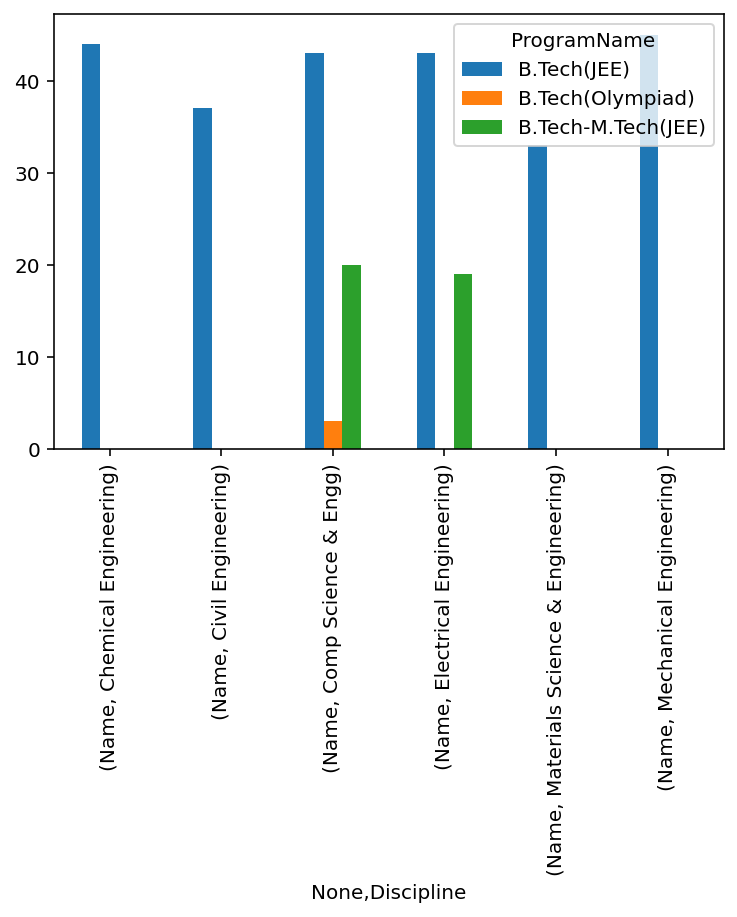

In [86]:
df.groupby(["Discipline", "ProgramName"])[["Name"]].count().unstack(0).T.plot(kind='bar')